In [0]:
def resize(path):
    dirs = os.listdir(path)
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((200,200), Image.ANTIALIAS)
            imResize = imResize.convert('RGB')
            imResize.save(f+".jpg", 'JPEG', quality=90)
            if (e !=".jpg"):
              os.remove(path+item)


In [0]:
from PIL import Image
import os, sys

path_normal = '/dbfs/FileStore/tables/X-Ray Image DataSet/normal/'
path_covid = '/dbfs/FileStore/tables/X-Ray Image DataSet/covid/'
path_viral = '/dbfs/FileStore/tables/X-Ray Image DataSet/viral/'

resize(path_normal)
resize(path_covid)
resize(path_viral)

In [0]:
import tensorflow as tf
import pyspark.sql.functions as f
import sparkdl as dl

/databricks/python/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
 from ._conv import register_converters as _register_converters
Using TensorFlow backend.

In [0]:
#dfDjokovic = spark.read.format("image").load('./FileStore/tables/5').withColumn('label', f.lit(0))
#dfFederer = spark.read.format("image").load('./FileStore/tables/X-Ray Image DataSet/covid').withColumn('label', f.lit(1))
from sparkdl.image import imageIO
normal_df= imageIO.readImagesWithCustomFn('./FileStore/tables/X-Ray Image DataSet/normal', decode_f=imageIO.PIL_decode).withColumn('label', f.lit(0))
viral_df= imageIO.readImagesWithCustomFn('./FileStore/tables/X-Ray Image DataSet/viral', decode_f=imageIO.PIL_decode).withColumn('label', f.lit(1))
covid_df= imageIO.readImagesWithCustomFn('./FileStore/tables/X-Ray Image DataSet/covid', decode_f=imageIO.PIL_decode).withColumn('label', f.lit(2))
display(normal_df)

image label List(dbfs:/FileStore/tables/X-Ray Image DataSet/normal/00001684_000.jpg, 200, 200, 3, 16, Binary image data placeholder. Access the image data field directly to view raw binary data., iVBORw0KGgoAAAANSUhEUgAAAGQAAABkCAIAAAD/gAIDAAAqV0lEQVR42pWdaZdV1XaGyyhDPzjUD+oYDruIICJEUOmMgtiBIiogiKAiiqBYgEJJgVgiigJ2KGDfK/Z93/fdVQS9guRqGnPNNeZv5Kn9nPPWqnMqJpkfzth1zt6redc755pzrrV2tfxdIaNHjz7//POPPvroESNGHHPMMf/YXfzm8MMPHzRo0OBKBhVyeJP8Q3fhGx4ZOHBg//79+Vy5cuW6devuvvvu559//osvvvjmm2++/fbb77777s+F/PDDD7n+/vvv+XXLli2bNm36+uuvv/rqq/fff//ZZ5+9995777rrrrVr106bNu2QQw459NBDKby5apttO70YXJcjCjmykKMqGTJkyNChQ4cNGzZ8+PCWEqwxY8ace+65fMtvIyoZXgnwNYBlZX8Mlnjl03u4Biw+V61atWHDhgceeOCZZ5754IMPRApEAGjr1q3b6rK1LuDlDXxu3rz5008/feutt3j2oYceohCKmjFjRt++fQcMGNAMUyTtbMArkP0/wDr99NPPOuusYZWAlBfeKl58pud/DFPJrDSLLxn2fv36cQ2zYMQjjzzy5JNPvv7665999hkQCEdJru/rAqe8AFaQeu+991599dUnnnji0Ucfvf/+++HXJZdccvDBB0vbwNSMWgPReoSsBK7EqxtYU6ZMOe2004ZUwm+UC6v9U36BYNmUHtWtFG4ux1MdRFkoDbDuu+++xx9/HLDQRDr/+eefh1+iA3x8s6mSLZWgrcD64Ycfvvnmm8899xzPPvbYY5ALvBYvXkzJjMSASgZWkmbkz/L7knF/wLXgVQNrxx135BMdPOWUU/iB4t555x2a1d7eftlll9FDweKzrKkBlwZpvo1yDjvsMD5POOGE1atX00mogSoB1iuvvAIEWCLxAiZw+VMlX375JUYtFx9//PG777778ssvY7AAC7ihJ2AtW7aMHoIX5Q+oS2m//qcWNts1UQMpPgMW0g2sCy644MQTT+Rb+Ew39t57b5oCBRguHoBWoNvQgv+1HRoRvgEmeKqanHHGGWvWrAEsekufX3jhhRdffBEbBBCAIpu4+KoukO6TTz4BTT4/+uijt99++6WXXoJZAL1x40bI9eCDD65YsWLkyJGYLWs5rJKSZT1Ks542m//g1Q2sWbNmHX/88fzWu3dv2sekc+WVV9IyCuV5aMUzZd0NMDXz3z9lkx1g5CnkoosuYv6CEU8//TS0AiyYhWZh6bFHwOR893klEMoLmM6v3MOdgMVT4EUJIE5Rt95668SJExnOPn36MLqpcUB3+b9D1oxXN7DmzJnD4PAbYNGOhQsXTp48+bbbbqNKnqEdoJv6yoq9LlvjdQkTYh/OPPNMxmD9+vXYZmgFWOjUa6+9BgRYLrgDTF9XEjX8U13AS7AAF7x4Vrwo6s4777z44ovhLNYWvKCYnkRJsWZpNho96qPGviVIIZgnDJPMguG4XcuXL4fn1MozNAJ0rThwpL7D6hI91ZzrKHBtu/FOZs6cSbFMheg4tdBn5jUmxIAVdL6pxD/5BD74pXUH3OD11FNP0UhctqVLl5533nkMBi2nGULmCDlsfDZwqqEXPUKW+bEbWK2trSJCx/BO+Zw6dSo2nmr4kp/AsQSlQUqwhIkSqNuGQsyxY8eec8458+fPv/nmmzHJmEWYRYfp9htvvIHNws+EO+CiqRIsjZd4oYaAhWUAL/AFMowdzAIs5lbs4Ny5c7G8NJtpHV+HljDwWn3bE5qXXXCwS3PcoI89gAWzsOI6YzxpuVTAA0Mr4bEGQ3BYk/hgv0qcyynt5JNPRkFACk2/+uqr0cGHH34YRggWzBIsmIWNd+4TLJVR+KCVYDEbcjOP8CCWSzMP+hTLnDhv3jz0kcHGZ2Ryx5em81AMotEX2iPH/8CWNeAV49UIFlY8Pphw0lWtFd+AmtOZBBad/nUJfDRIFeDx4447jkHG9tF6+nDFFVfceOON99xzD1MYncTiSCvIgrMCs8CiJBfCn8CngddmcadgwSzNPDYePx7VxiPBIELeSy+9lGkErQSyU0899dhjj6XxGjLxKs1ZA0wNeMXY1wz8DjvsAGRtbW1QF2gS6wyrC1/yZ6a/GG+pF9WjHTaICpgrGNgJEyZMnz4dO4WHTR9QamYMZvo4DYCFQtF5+AJSeAaYLaAJWCLltbOhzOIpmIUaYrbAHarix99xxx3XXXcdeDEqjD1EpmoawERJY4CM8XNSDmTNtqz0XUvjVWMWYPXq1QsCO0cKjRhJK0QdjM6XVqCkNyUAE4OJ3mE7IBQeiUgxGPSEaUsdBCl1EMEGhVkgAkCx67BJq69TCppoK2DpQLxYCXgxXUAuCmcwrrnmmiVLllDd5ZdfLmQYMiCD4NAc9whOMMA0OOasdM16dFlrYInXLrvsAnVlRyA4pBA1yxv8Jh4gZYEm1gHXfNy4cbCJyIl4gFGdPXs2RnfBggWMNtbqlltuwRLjFjkPQqsYLPgCa7BZ8a381L0SPv7kHsFCc50TEZwPzTx4rVu3Dkvf0dEBXsRAixYtAjJ4UComUTDtHDVqFEMbn7l0d+RaXEWvW+AUYO2000677rorZTWQRUSASZ8lxttrOMgQMVDYb0huHH722WdPmzZtxowZlMaQMrC0FaSuuuoqgoENGzYY5Rji6DQAFkhBqxIste/jSmATeMkyrrnTCRHIXquEclBq2ErJlI+lBy/4dVVdQA3FhN2MnJDRSIaTBjNHY1jxmdRQdTOMKeeuLmbtscce9DCzGBiBJVgwAii8KDCdTa1k0qRJEyvBqeGaX6ES1aN0gYlm0TiQoqF4QCggXrvBM7RCd+SU1l2wtFnhETBBIr7nV76XYqohOqv3oAPBp9GiPhd4MSoYe2IgfDpYBqkhmrZMyJhtIP6FF14IZHRh/PjxDDbdob84g6gIBg7emSYRwRpYMGuvvfZCpSERgSF3cDfahKqjQdS3shI6zNxM5xkrqneeZpQwB8DEzeodhKdBNIvG0UTupNGEI0yCuNpGziD1dl3AQlBglmCpfWAHlDKInzRe3BBN1MYjiX6eqYSpFrPI5HjTTTfRZtoPy4CMZqubtA2nEsjm1IWO0FOhpP2z6sLAAyWqU/PgBWufffbBKsMp7DoYgzfPUDp1XHvttcz3GE6qZyKD6hgIxtABpEHUwUBRNI/QCNiEcaVZoEkraS73YHq5n6dAir7psquDwqHNMlo2GORCugkidFMN9R4oRL0DHTjlGDxbFwNGhodmU/sNN9xAL6TYskq4oG2wT8twf12wevSRT5SAnxhj2g+OaEyLfgNgHXDAAegXEAIk3ba3t99+OyaZB5iS6S3PP1wJBIHtekk0mhZzD00BNR7EPwBlYaKV/BSUnbzgQmyNIQufoAZfQi6gkUdCJlggqBpSL6XREhChMVCJ7vEJRo4HeNFCfiIMwuTTizWVgJ0E5zYqfacSqc0ng+cYUDK32X3iDeCGnjXXAbCwUNAHEvKtKsOteC50ErzBHlvzVCG6lOkn7OBLAF21ahVjCEyURjWgTHODFDdjXMCIB+kYjX6kEvoJW/le81SCBbPkl1zjG6rjcZ6VAkLGeNBmx5K69Ozll5ShCkdXM0chIqU6+2XmViGj1/CDTlELBrdrNmQe5fn7KqE+yqXpT1ZizsiOmdiUIOk5SOmCUzHfczMow2GqEW6ApsCXKnGapyjT5w/WRXNGaUCDaVfjwMgx50sQ5HsuuIfSLIG6KJwW0maVSPjoqi0UHVv4ViVqvSy2zZpO7SYX

In [0]:
normal_train, normal_test= normal_df.randomSplit([0.8,0.2])  # use larger training sets (e.g. [0.6, 0.4] for non-community edition clusters)
covid_train, covid_test= covid_df.randomSplit([0.8,0.2])     # use larger training sets (e.g. [0.6, 0.4] for non-community edition clusters)
viral_train, viral_test= viral_df.randomSplit([0.8,0.2])  
train_df = normal_train.unionAll(covid_train).unionAll(viral_train)
test_df = normal_test.unionAll(covid_test).unionAll(viral_test)


In [0]:
display(test_df)

image label List(dbfs:/FileStore/tables/X-Ray Image DataSet/normal/00001445_000.jpg, 200, 200, 3, 16, Binary image data placeholder. Access the image data field directly to view raw binary data., iVBORw0KGgoAAAANSUhEUgAAAGQAAABkCAIAAAD/gAIDAAAp5ElEQVR42rXce9R/13Tv8eevXv/pf73qMETDcTmkJ0FIKq5NpdVURNKgTYhGEo3m4hKUaFC3Ci1FKUVpm6JoiyrHcStFEZWKJEQkERJ60XMO/e+8fvudZ/727/s8v5/IGGeO8eyxn/3de601P+sz55prrrX31mc/+9lnPvOZ97nPfQ477LB73eteR27LEUcc4d97bsvhi9xjkbvf/e53W+SwRf7Htvzsz/7sIYcc8t8XudOd7nTHO97xvy1y8CKuKPPEE088/fTTzz777Cc+8Ym//du//Tu/8zu/+7u/+4IXvODFL37xy172sje84Q1/+qd/evHFF//FX/zFW97ylje96U1/9md/9ta3vtW5k7/8y7905U/+5E9e+9rX/sEf/MHzn/98zz772c/WfkWdf/7555577hlnnPHwhz9cRWpX6e1ud7s7LKJ2rbrLXe5y17veVSPvskhX1kc/UWQUvPe97/20pz3tox/96DXXXHPttdduffKTn3zqU5/qqpsC6+d+7ucGr+Reiwxq4VWJwDr00EM9G0x3XqT23f72t9dWjXaP8h/4wAcee+yxj3nMY8477zy60ZCez3ve8yD1ohe96Pd///df8YpX/Pmf/zlc3v72t//1X/+1k9e97nWvfvWrgfW2t73tzW9+sxNH97z+9a93/SUveclFF13k2Re+8IXKec5zngN6kD3+8Y8/6aSTHvKQhxx99NGaDYLptkFNIx3vuIgr0+yu63WqOafjmWee+f73v/+qq6760pe+tAess846CwR0hgVoginINsAapAJ+2KS7tKn6AAQm527W3F/5lV854YQTHvnIR5588smPfvSjzznnHDDRjYbYhCB/+Id/iFOvfOUr8eUti7zjHe8A1t/8zd+88Y1vxDX/vvOd7/zbv/1bIELNDfBy88tf/nLPvnwRJYAbdkp+xjOeAa/f/M3fpCcWn3rqqY94xCNg9/M///OU0nOaGkCarcFUOOqoozSVgtTUr7gZe9zg8b//+7//4he/eOWVV24p9LGPfSz96QwId2+gQ9Y8WltcAOmxAPKvR9TK1uCioY973ON+67d+65xFOsFq5kOrl770paj0R3/0Rzjyx4vQH3cg8q53veudi0CK0QEIUn+1CAQ7gdcfb8trXvMahYAbaiCD19Of/nQV4a8TdvOUpzzlSU96EiMFH2prFQj0otYipvJR9ZJLLqELQNXuQQD5FZSPetSj3vve96LVFVdcsfUDP/ADnkcr9ANHxHF07uKAcqdt8XyURmC/KvEBD3jAQx/6UIVqBDg4I7agidNc4qQrjAVSCEU3GgIIHK9bBI+ggEfvec97tBVAnBT4AKS5f/d3f+c6BFkijwYs3s1TAKWqQkD2qle9CtcQVi0XXnjhs571LJY+R0Z6wQUX4J1z7NZ5iKLlSESdj3zkIzTS8oc97GH6nhY0wgCs1Bi0uvzyy7e+//u//5RTTkEWuB66SPQDkHP8uv/973/MMcfoB0x2PO644xSnCHzUV0qHhXZoXG16ziJcb+fTUO1zwvoghQKQol7agon/BgGwYKRx3MS73/1uYPkJFkwPTO9ZRM+Dz0/w4u/dALU4iGWoirP84PMWef4iz13Ev1qlSX51MY7HO41nuY1yqtMxWgjB29zmNpRVI6Quu+yyPWBxKOgD1wYyzOKMORpwYC9tcUFlTnLGv/d7v9dRZS/cV1x53rbMeU0kzhWVh8ICYGkZbaltBKQ/WgFLWwMLgq676Ip//eT4jkVY65sXcUNgxS9gKR+5NE97XrQIzZl8o4HrfnVFn6Et9HUbWgFamTqVb0WL+973vkjDkuDAgULq0ksv3fq+7/s+LsZV3EMoMGGNoR0RGqRUryk0GZNxQtWoMZ1ZOwY1DWIRTqaT16Oep+hGyTcuonCOQ9OhgDWY9YEPfIDpIRoFMkzwuZ49av04e8+GaQGHMrUKXsZKbXBUI1xc1CWarak5Afdojx5Fq7xEocyFizg3artI5c985jNGw5vMkGVBihn+0i/9EpPkd9ydYhQOo4wlIuQyHLUyQ3jDIu7UFI3QMhc93rgORI2GEXwLl4Ydeeu3LjLQgON/LoI4lPeU0tgCsFzMnfVUj0OtaAPQHncFiB7Jhb1skQAq/ijyQK5aS9yZ06QO1TTSv3mJ973vfRzWV7/61a985St7wOKSUA5Sp512Gk49+clPhiujo6EKIKXFoNEOzaLqxdvSuRYUB/n33YtoELrVsZUASne+bRHluCGn42J+KivrJ+d4hERFoaoGBAThFbOAAh1HjsxJlpj7c3Mg1h95veivJbBzZw92JIpVddQOzWzcI1quJTh1/fXXX3fddXvAgtHxxx8fp3LYmJUnVjrUaaVoJVaH4kKqNs0QplzHulejo6TG6SidiVngwzUGbkhSRYapYzXLDZ6q3UR/IlHYoYky/QupqoAXfmkMKANCIfjLLRrvHFWE1+jjhmI37anPNNvjylfU/1rEeWyF17AbWDHrwx/+sLjha1/72p4IXujAeYs7hEWQUhlOZeS5FUipQN8qtIY6ppJzlSlOZaqJO0WPNHE/JRWSl6UMdMCkM+AFLEdDEr/AU/C+7IIy+SPPclvOAd0IEIIf/OAHs0T60EQH6FRFKVPjjWsKbHRTF73ynkpoMI2eWTToFfjeRRphG17wuj7TGOV7KjPcwyxg6QQRBwOkiZFL6dmwhuqT8QgKhQsdNNfJhz70IdH/P/7jP7qi7pTUgTpTxfrNdU1UCBTy8fqcMvqjqIIyTe4S/+JIfaPdykQrLcYdpOhKbl7HqIjHUU5BXHFJkUpFNVjHXIWASYOzbiWAIK/iXAcYDWNuvtJtVFCvB/109dVXf/3rX4fX1g/+4A9ShufnqtQBODfpCjyMIGCO9uQf/uEfPvaxj31oEdPLsEMuxzqnmV3Ezj2nqi7SegxSCwqAjJJQCzta+bVhK/9IDZWOjSuTJvVTfd5EemIoACkcXhFWHxSj6PLm5MrxrPZrbWNuesGFFnTR8Z/4xCc+tojb/Kr9bvunf/ons+gbbriBJe4BC49QV+v1A0czzijqUjsPQsCsoGqtowLOlcJFmlBJI2Ck3Rqd42sep/XN3VQnRBYHonOOkqqxoP6kXramMXVYVFULYy8yyNBgPbOZ8xdRPugrqsiL0AsD4hd1tBP6+ZAPLuIEWPT65CLdo2pxA2914403ItfWD/3QD3FPmYb+Z0TaN5xqtCaKU7SaKl25kTkoVew8O2XzWqm5wCpwpxWTMRgpv2gQLqpLSaQ283jCE56AdAhCMe1hvGpvoCh0VLUGaBXqQQqn9K5HlAB0JTiBlGIxVC3KQQKVFgPqNo8gmuZxHYqCPmg0GJU+usjHP/5xR//STnXp/rnPfY63+sY3voFce8ACP62UpUu5jAww/z2jxocXCSzA56feuy3d5icnPLpWlgDQ8/xIoTwNX7UIyIoMOUe3NR8odnV0HQuABRcwaZtHMF0b1Mg8jXG5v5w6ARlzbqqgqGByVFRzj6aHfsVuzdPgSJRXISnI4vLCpJHE8fOf/zwDvHGRrR/+4R/Wk+pWegFnSZJsMBRAwwAVp3QFKfR9iyiuk0inaFoV14AGCimQeyK45orrRYOaXtwLviZAYNL5HgdWUUgpQKOH2vO7erQHL1rkxYtU5kw53VA3NJ1w0lzHPQrHTQ2GS1SilJbTkQr//M//HF75Gb/uAxafpX1Kj/w8QhN9dG30Ua6yPK8HHJXlpJAnsByVC00qeZwycId+CUzC

In [0]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from sparkdl import DeepImageFeaturizer 

featurizer = DeepImageFeaturizer(inputCol="image", outputCol="features", modelName="InceptionV3")
lr = LogisticRegression(maxIter=20, regParam=0.05, elasticNetParam=0.3, labelCol="label")
p = Pipeline(stages=[featurizer, lr])

p_model = p.fit(train_df)

In [0]:
p_model.stages[1].write().overwrite().save('lr')

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

tested_df = p_model.transform(test_df)
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
print("Test set accuracy = " + str(evaluator.evaluate(tested_df.select("prediction", "label"))))

Test set accuracy = 0.8070175438596491

In [0]:
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import expr
def _p1(v):
  return float(v.array[1])
p1 = udf(_p1, DoubleType())

df = tested_df.withColumn("p_1", p1(tested_df.probability))
wrong_df = df.orderBy(expr("abs(p_1 - label)"), ascending=False)
display(wrong_df.select("image.origin", "p_1", "label").limit(10))

origin,p_1,label
dbfs:/FileStore/tables/X-Ray Image DataSet/covid/covid_19_pneumonia_rapidly_progressive_admission.jpg,0.0033858344285349826,2
dbfs:/FileStore/tables/X-Ray Image DataSet/covid/1_CXRCTThoraximagesofCOVID_19fromSingapore_pdf_002_fig3b.jpg,0.005595291209042437,2
dbfs:/FileStore/tables/X-Ray Image DataSet/covid/1_s2_0_S0140673620303706_fx1_lrg.jpg,0.0060651511323368944,2
dbfs:/FileStore/tables/X-Ray Image DataSet/covid/covid_19_pneumonia_24_day12.jpg,0.006899208913940275,2
dbfs:/FileStore/tables/X-Ray Image DataSet/covid/F4341CE7_73C9_45C6_99C8_8567A5484B63.jpg,0.008104717908730174,2
dbfs:/FileStore/tables/X-Ray Image DataSet/covid/F63AB6CE_1968_4154_A70F_913AF154F53D.jpg,0.010353341829332625,2
dbfs:/FileStore/tables/X-Ray Image DataSet/covid/5931B64A_7B97_485D_BE60_3F1EA76BC4F0.jpg,0.01757719752618542,2
dbfs:/FileStore/tables/X-Ray Image DataSet/covid/1_s2_0_S1684118220300608_main_pdf_002.jpg,0.021078366561375426,2
dbfs:/FileStore/tables/X-Ray Image DataSet/covid/7D2CF6CE_F529_4470_8356_D33FFAF98600.jpg,0.024170134684934685,2
dbfs:/FileStore/tables/X-Ray Image DataSet/covid/1_CXRCTThoraximagesofCOVID_19fromSingapore_pdf_003_fig4b.jpg,0.025380718288384934,2


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.GnBu):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
from sklearn.metrics import confusion_matrix
y_true = tested_df.select("label")
y_true = y_true.toPandas()
y_pred = tested_df.select("prediction")
y_pred = y_pred.toPandas()
cnf_matrix = confusion_matrix(y_true, y_pred,labels=range(3))

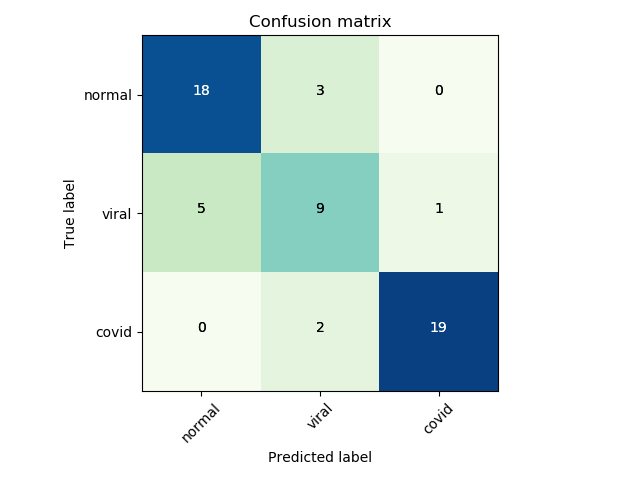

In [0]:
display(plot_confusion_matrix(cnf_matrix, classes=["normal","viral","covid"]))

In [0]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in ["normal","viral","covid"]]
print(classification_report(y_true, y_pred, target_names = target_names))

precision recall f1-score support

Class normal 0.78 0.86 0.82 21
 Class viral 0.64 0.60 0.62 15
 Class covid 0.95 0.90 0.93 21

 micro avg 0.81 0.81 0.81 57
 macro avg 0.79 0.79 0.79 57
weighted avg 0.81 0.81 0.81 57